# PR-22e-09 - Evaluation
### $G  = 4.30\,G_0$
### $\tau_i = \{???\}$

- 23_11_15_PR22e9_4.3G_1.hdf5 
- 23_11_15_S22_breaking_1.hdf5

In [1]:
# initialize stuff
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import importlib
import logging

import numpy as np
import matplotlib.pyplot as plt

sys.path.append("/Users/oliver/Documents/p5control-bluefors-evaluation")
sys.path.append("/home/oliver/Documents/p5control-bluefors-evaluation")

from utilities.baseclass import BaseClass
from utilities.baseevaluation import BaseEvaluation
from utilities.baseplot import BasePlot
from utilities.ivevaluation import IVEvaluation

importlib.reload(sys.modules["utilities.baseclass"])
importlib.reload(sys.modules["utilities.baseevaluation"])
importlib.reload(sys.modules["utilities.baseplot"])
importlib.reload(sys.modules["utilities.ivevaluation"])

import utilities.basefunctions
importlib.reload(sys.modules["utilities.basefunctions"])

from utilities.corporate_design_colors_v4 import cmap
importlib.reload(sys.modules["utilities.corporate_design_colors_v4"])

importlib.reload(logging)
logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO, format="%(message)s")
# pip install numpy matplotlib scipy tqdm torch hdf5view h5py PySide6

In [2]:
# Settings of Evaluation
from utilities.ivevaluation import IVEvaluation

importlib.reload(sys.modules["utilities.ivevaluation"])

eva = IVEvaluation()
eva.file_directory = "/Volumes/speedyboy/atomic-contact/"
eva.file_folder = "4.30 G_0/"
eva.setAmplifications(1000, 100)
eva.setV(1.0e-3, voltage_bins=4000)
eva.setI(300e-9, current_bins=4000)
eva.downsample_frequency = 43

# # Quatsch
# eva.file_name = "23_11_15_S22_breaking_1.hdf5"
# eva.showMeasurements()

eva.file_name = "23_11_15_PR22e9_4.3G_1.hdf5"
eva.showMeasurements()

(base) ... BaseClass initialized.
(base eva) ... BaseEvaluation initialized.
(iv eva) ... IVEvaluation initialized.
(base eva) Available measurements:
- "magnetic fields_nanGHz_+nandBm"
- "single IV_+0.00mT_nanGHz_+nandBm"
- "vna frequencies_-25.00dBm_+0.00mT"
- "vna frequencies_-25.00dBm_+10.00mT"
- "vna frequencies_-25.00dBm_+20.00mT"
- "vna frequencies_-25.00dBm_+5.00mT"
- "vna frequencies_-30.00dBm_+0.00mT"
- "vna frequencies_-30.00dBm_+10.00mT"
- "vna frequencies_-30.00dBm_+20.00mT"
- "vna frequencies_-30.00dBm_+5.00mT"
- "vna powers_15.000GHz_+0.00mT"
- "vna powers_15.000GHz_+10.00mT"
- "vna powers_15.000GHz_+20.00mT"
- "vna powers_15.000GHz_+5.00mT"
- "vna powers_19.300GHz_+0.00mT"
- "vna powers_19.300GHz_+10.00mT"
- "vna powers_19.300GHz_+20.00mT"
- "vna powers_19.300GHz_+5.00mT"
- "vna powers_7.800GHz_+0.00mT"
- "vna powers_7.800GHz_+10.00mT"
- "vna powers_7.800GHz_+20.00mT"
- "vna powers_7.800GHz_+5.00mT"


In [3]:
# Evaluating Amplitude Studies

filenames = [("23_11_15_PR22e9_4.3G_1.hdf5", True)]
powers = [
    ("-25.00dBm", "0.02V"),
    ("-30.00dBm", "0.01V"),
]
eva.setA(0, 0.08, 160)

for filename, eva_T in filenames:
    eva.file_name = filename
    eva.eva_temperature = eva_T

    for mag in [
        "0",
        "5",
        "10",
    ]:
        for freq in [
            "7.8",
            "15.0",
            "19.3",
        ]:

            eva.sub_folder = "amplitude study"
            eva.title = f"Amplitude Study ({freq}GHz, {mag}mT)"
            eva.setMeasurement(f"vna powers_{freq}00GHz_+{mag}.00mT")
            for p in np.arange(30.5, 35.50, 0.5):
                eva.removeKey(f"P=-{p:.1f}0dBm")
            eva.setKeys(index_0=2, index_1=-3, norm=1, to_pop="no_power")
            eva.addKey("no_power", -1000)
            (eva.up_sweep,) = eva.getMaps([1])
            (eva.up_sweep,) = eva.getMapsAmplitude([eva.up_sweep])
            eva.y_axis = eva.amplitude_axis
            eva.saveData()

        for P, A in powers:

            eva.sub_folder = "frequency study"
            eva.title = f"Frequency Study ({A}, {mag}mT)"
            eva.setMeasurement(f"vna frequencies_{P}_+{mag}.00mT")
            eva.setKeys(index_0=3, index_1=-3, norm=1e9, to_pop="no_frequency")
            eva.addKey("no_frequency", 0.0)
            (eva.up_sweep,) = eva.getMaps([1])
            eva.saveData()

# 5m 43.3s

(base) Amplitude Study (7.8GHz, 0mT)
(iv eva) getBackupTemperature()
100%|██████████| 42/42 [00:02<00:00, 18.09it/s]
(iv eva) getMapsAmplitude()
(base) saveData()
(base) Amplitude Study (15.0GHz, 0mT)
100%|██████████| 42/42 [00:02<00:00, 18.04it/s]
(iv eva) getMapsAmplitude()
(base) saveData()
(base) Amplitude Study (19.3GHz, 0mT)
100%|██████████| 42/42 [00:02<00:00, 18.48it/s]
(iv eva) getMapsAmplitude()
(base) saveData()
(base) Frequency Study (0.02V, 0mT)
100%|██████████| 201/201 [00:10<00:00, 18.90it/s]
(base) saveData()
(base) Frequency Study (0.01V, 0mT)
100%|██████████| 201/201 [00:09<00:00, 21.84it/s]
(base) saveData()
(base) Amplitude Study (7.8GHz, 5mT)
100%|██████████| 42/42 [00:03<00:00, 10.94it/s]
(iv eva) getMapsAmplitude()
(base) saveData()
(base) Amplitude Study (15.0GHz, 5mT)
100%|██████████| 42/42 [00:03<00:00, 13.31it/s]
(iv eva) getMapsAmplitude()
(base) saveData()
(base) Amplitude Study (19.3GHz, 5mT)
100%|██████████| 42/42 [00:02<00:00, 17.87it/s]
(iv eva) getMaps

(base) ... BaseClass initialized.
(base eva) ... BaseEvaluation initialized.
(iv eva) ... IVEvaluation initialized.
(base) ... BaseClass initialized.
(base plot) ... BasePlot initialized.
(iv plot) ... IVPlot initialized.
(iv plot) smoothing = False
(iv plot) window_length = 5
(base) Amplitude Study (7.8GHz, 0mT)
(base) loadData()
(base) 0 mT
(base plot) saveFigure()
(base plot) saveFigure()
(base) Amplitude Study (15.0GHz, 0mT)
(base) loadData()
(base) 0 mT
(base plot) saveFigure()
(base plot) saveFigure()
(base) Amplitude Study (19.3GHz, 0mT)
(base) loadData()
(base) 0 mT
(base plot) saveFigure()
(base plot) saveFigure()
(base) Frequency Study (0.02V, 0mT)
(base) loadData()
(base) 0 mT
(base plot) saveFigure()
(base plot) saveFigure()
(base) Frequency Study (0.01V, 0mT)
(base) loadData()
(base) 0 mT
(base plot) saveFigure()
(base plot) saveFigure()
(base) Amplitude Study (7.8GHz, 5mT)
(base) loadData()
(base) 5 mT
(base plot) saveFigure()
(base plot) saveFigure()
(base) Amplitude Stu

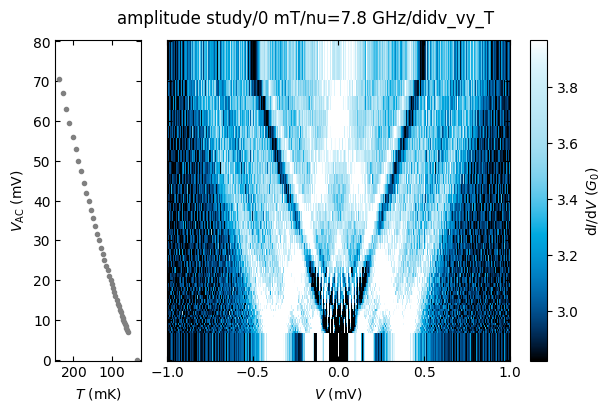

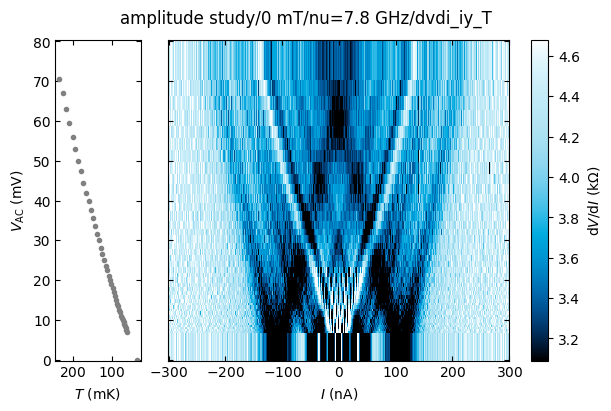

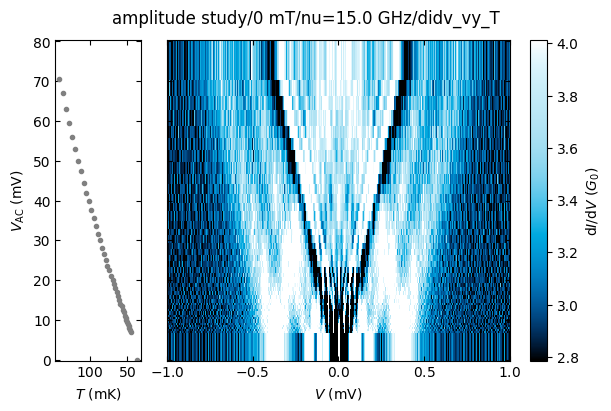

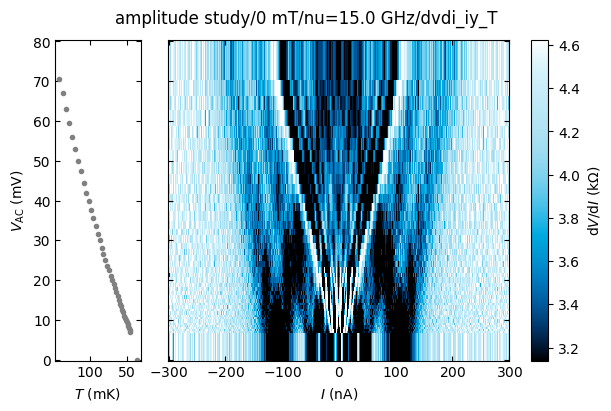

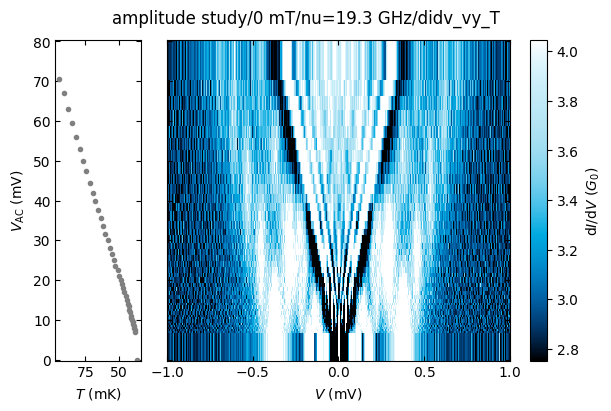

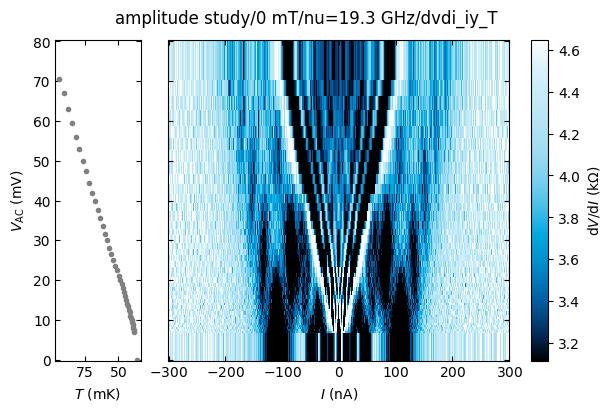

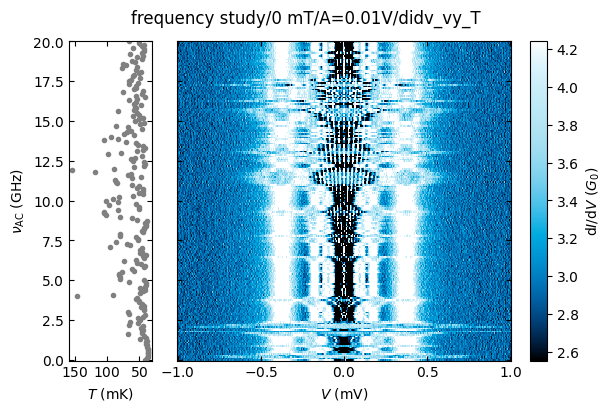

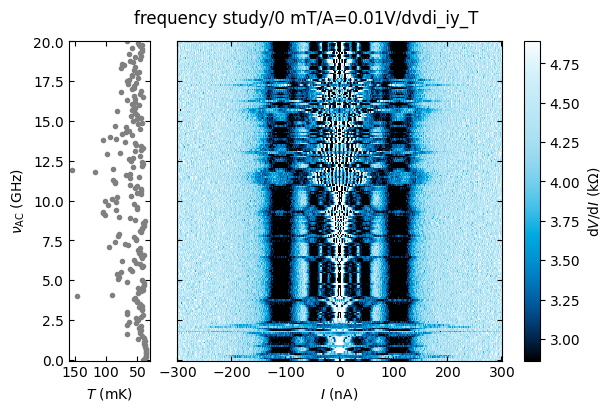

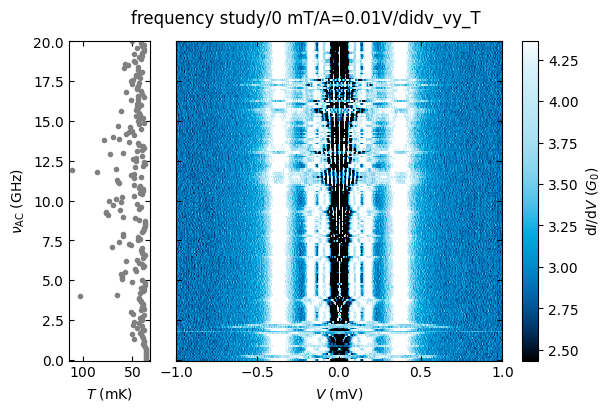

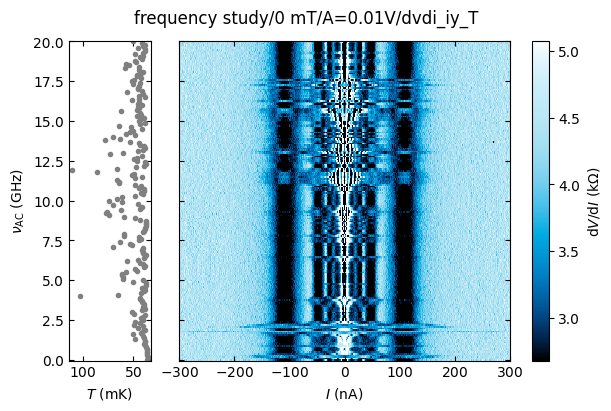

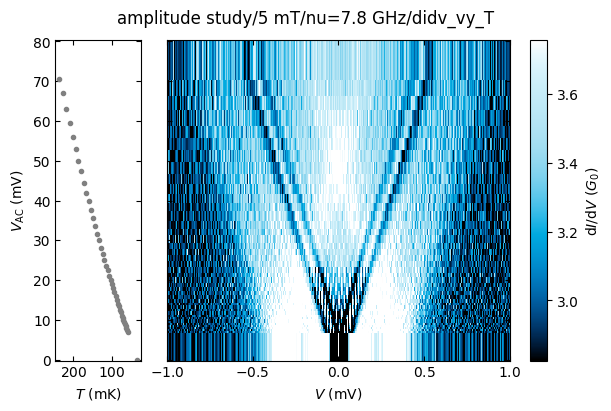

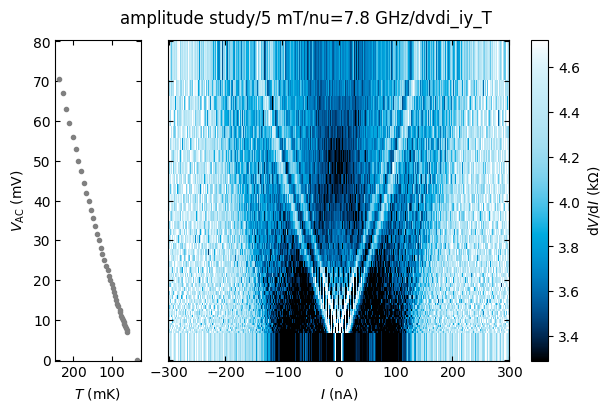

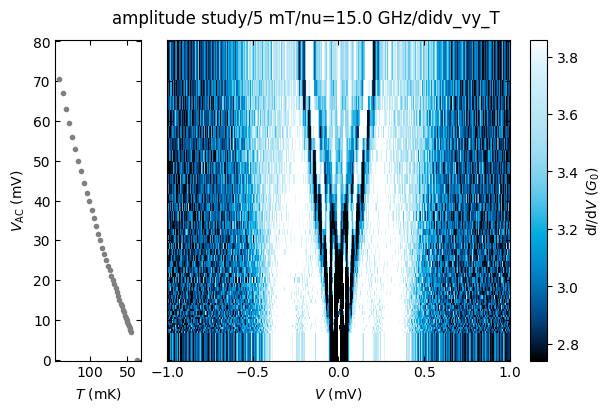

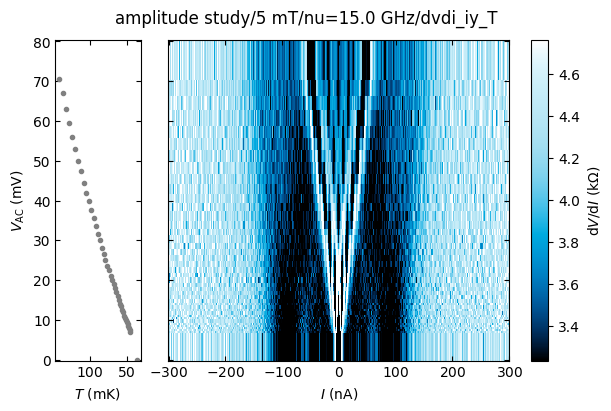

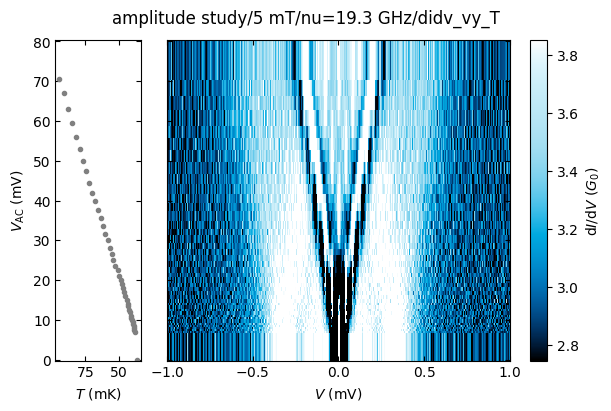

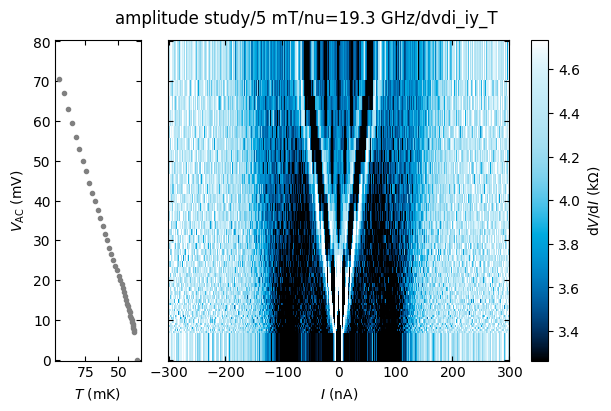

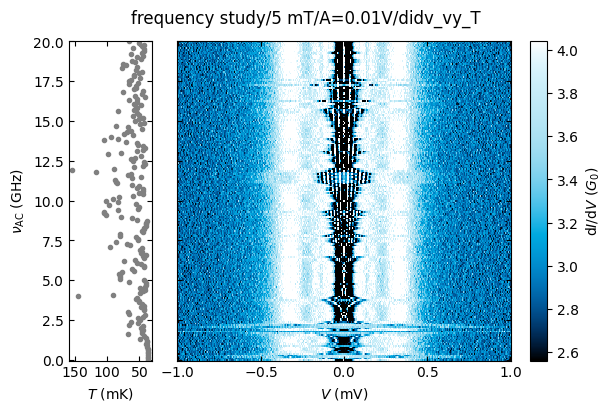

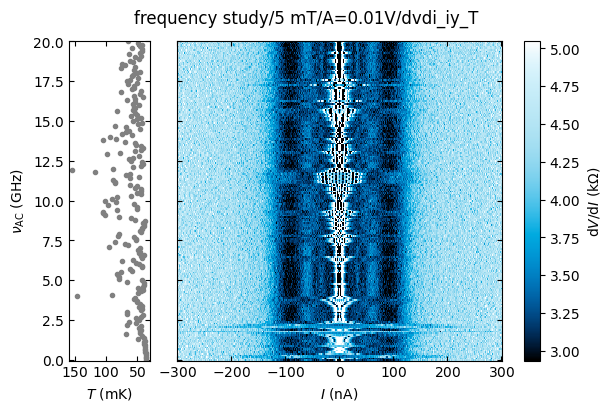

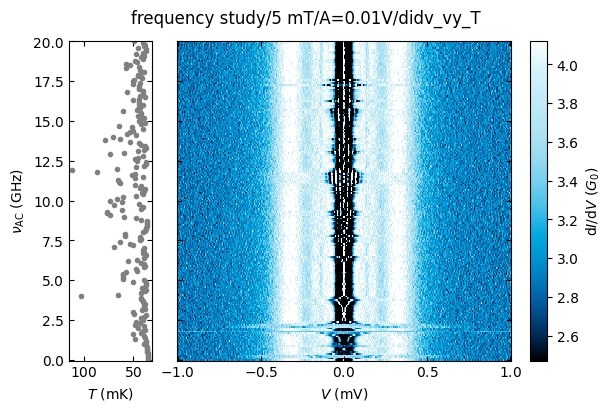

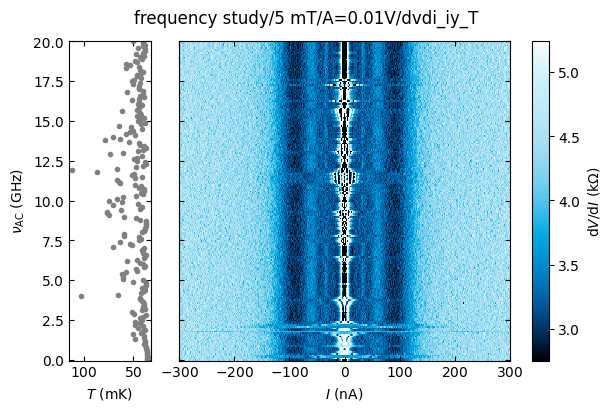

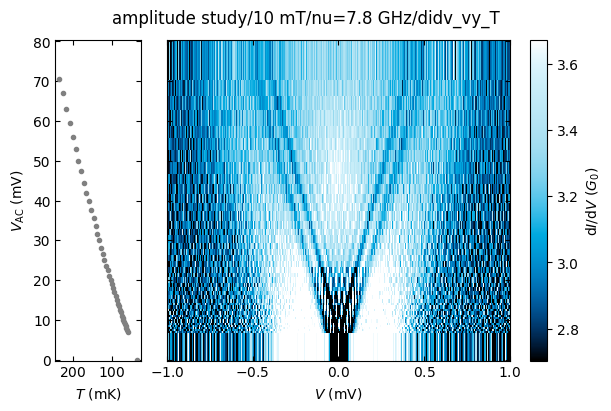

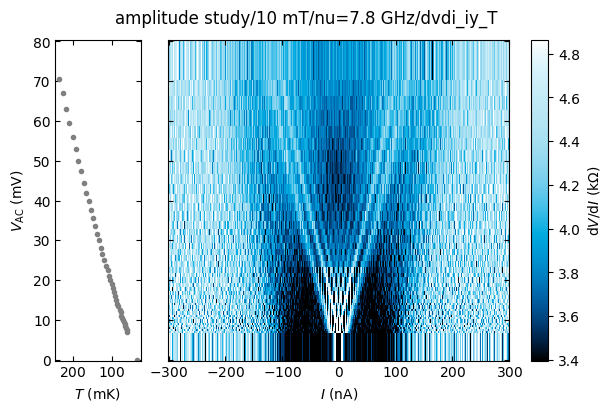

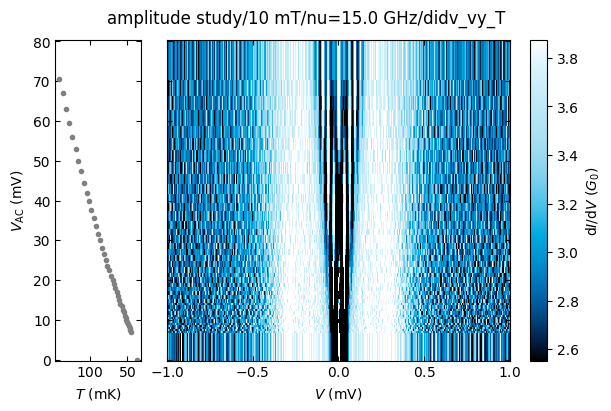

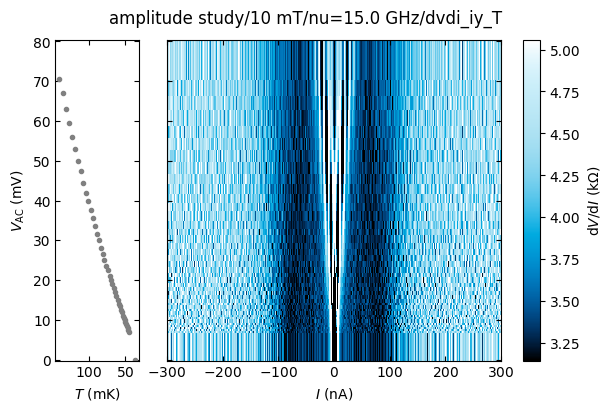

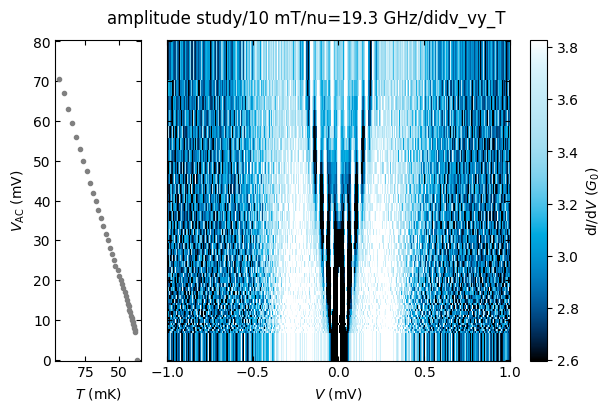

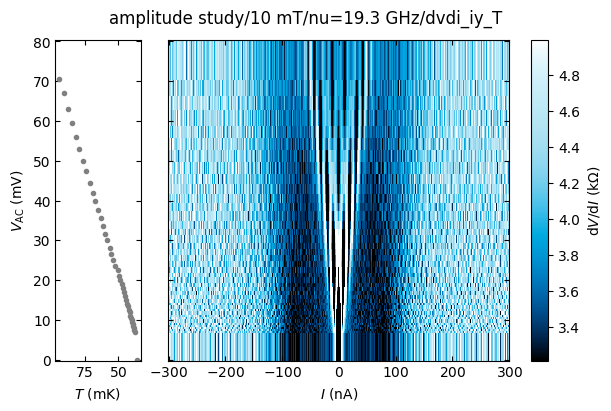

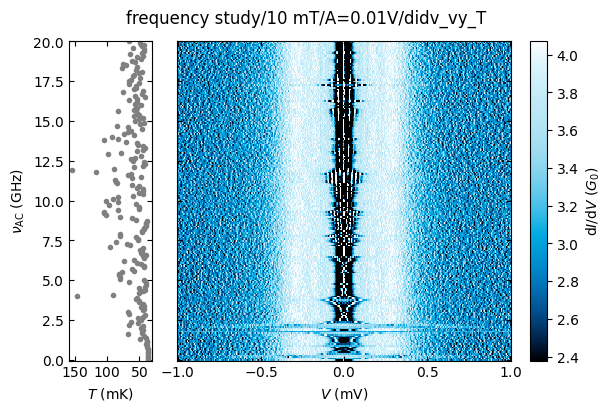

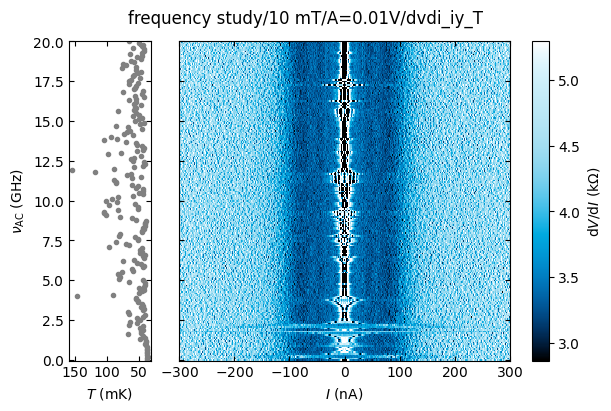

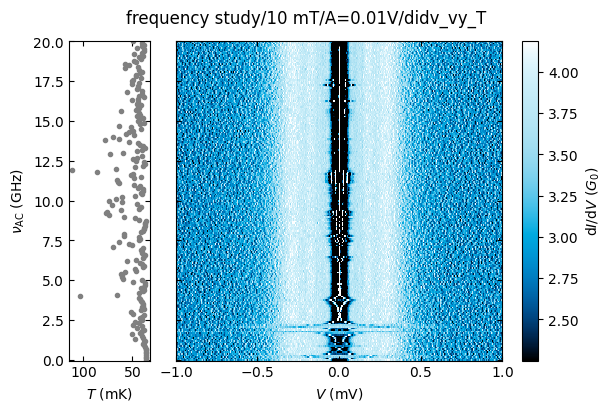

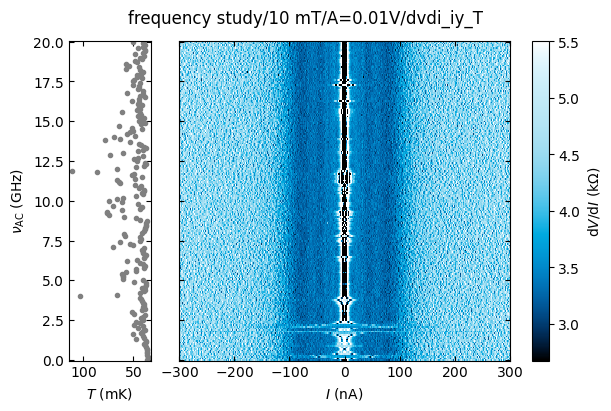

In [4]:
# Plot Everything
%matplotlib inline
from utilities.ivplot import IVPlot
importlib.reload(sys.modules["utilities.ivplot"])

eva = IVPlot()
eva.smoothing = False
eva.window_length = 5
eva.plot_T = True

filenames = [
    ("23_11_15_PR22e9_4.3G_1.hdf5", True)
]
powers = [
    ("-25.00dBm", "0.02V"),
    ("-30.00dBm", "0.01V"),
]

for filename, eva_T in filenames:
    eva.file_name = filename
    eva.plot_T = eva_T

    for mag in [
        "0",
        "5",
        "10",
    ]:
        for freq in [
            "7.8",
            "15.0",
            "19.3",
        ]:

            eva.sub_folder = "amplitude study"
            eva.title = f"Amplitude Study ({freq}GHz, {mag}mT)"
            eva.y_characters = [r"$V_\mathrm{AC}$", "V"]

            eva.loadData()
            eva.to_plot = eva.up_sweep
            eva.title = f"{mag} mT"
            eva.title_of_plot = f"nu={freq} GHz"
            eva.plot_all()

        for P, A in powers:

            eva.sub_folder = "frequency study"
            eva.title = f"Frequency Study ({A}, {mag}mT)"
            eva.y_characters = [r"$\nu_\mathrm{AC}$", "Hz"]

            eva.loadData()
            eva.to_plot = eva.up_sweep
            eva.title = f"{mag} mT"
            eva.title_of_plot = f"A=0.01V"
            eva.plot_all()

# 5m 43.3s